# 01 - Explorative Datenanalyse

Erste Exploration der World Development Indicators (WDI).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 100)

## 1. Übersicht der Dateien

Der WDI-Download enthält mehrere CSVs:
- `WDICSV.csv` – Hauptdaten (Länder × Indikatoren × Jahre)
- `WDISeries.csv` – Beschreibung der Indikatoren
- `WDICountry.csv` – Länderinfos (Region, Einkommensgruppe, etc.)

## 2. Hauptdatensatz laden

In [3]:
df = pd.read_csv("../data/raw/WDICSV.csv")
print(f"Shape: {df.shape}")
df.head()

Shape: (402458, 69)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.494704,11.841055,12.202523,12.573380,12.958690,13.371142,13.782714,14.254178,14.736586,15.171557,15.620173,16.123198,16.599734,17.061049,17.634150,18.145833,18.685118,19.205632,19.742772,20.332679,20.862800,21.419621,21.996456,22.541440,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.548167,3.704024,3.890043,4.091720,4.274249,4.532521,4.757490,5.004035,5.248924,5.499747,5.747851,6.028196,6.309218,6.643625,6.932310,7.259936,7.606712,7.926604,8.309896,8.704591,9.106640,9.480804,9.903209,10.288154,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.350689,32.683340,33.100177,33.490465,33.991183,34.470608,34.922656,35.501028,35.915354,36.435216,36.822687,37.252570,37.635987,37.969321,38.340232,38.741988,39.052626,39.321068,39.649534,39.968299,40.354628,40.723805,41.026351,41.289974,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.917256,19.944277,21.548647,22.493217,23.724455,23.449539,25.172482,26.795145,25.908845,26.187846,27.414954,28.909756,31.673427,31.723574,31.871956,33.922276,38.859598,40.223744,43.035073,44.390861,46.282371,48.127211,48.801258,50.667516,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.672653,NaN,NaN,9.792811,10.890979,10.336474,12.420047,12.364996,12.798477,15.538849,14.588830,16.056639,19.399903,18.783058,17.685455,16.495064,24.584906,25.375037,26.941984,28.983183,30.909991,32.709837,33.747222,35.240236,NaN


In [4]:
df.columns.tolist()

['Country Name',
 'Country Code',
 'Indicator Name',
 'Indicator Code',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023',
 '2024']

In [5]:
print(f"Länder/Regionen: {df['Country Name'].nunique()}")
print(f"Indikatoren: {df['Indicator Name'].nunique()}")

Länder/Regionen: 266
Indikatoren: 1513


## 3. Indikator-Metadaten

In [6]:
series = pd.read_csv("../data/raw/WDISeries.csv")
print(f"Shape: {series.shape}")
series.head()

Shape: (1513, 20)


,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type
0,AG.CON.FERT.PT.ZS,Environment: Agricultural production,Fertilizer consumption (% of fertilizer produc...,Fertilizer consumption measures the quantity o...,Fertilizer consumption measures the quantity o...,% (ratio),Annual,NaN,The world and regional aggregate series do not...,Weighted average,The FAO has revised the time series for fertil...,NaN,NaN,"FAO electronic files and web site, Food and Ag...",Methodology: Fertilizer consumption measures t...,"Factors, such as the green revolution, have le...",NaN,NaN,NaN,CC BY-4.0
1,AG.CON.FERT.ZS,Environment: Agricultural production,Fertilizer consumption (kilograms per hectare ...,Fertilizer consumption measures the quantity o...,Fertilizer consumption measures the quantity o...,kg per hectare of arable land,Annual,NaN,The world and regional aggregate series do not...,Weighted average,The FAO has revised the time series for fertil...,NaN,NaN,"FAO electronic files and web site, Food and Ag...",Methodology: Fertilizer consumption measures t...,"Factors, such as the green revolution, have le...",NaN,NaN,NaN,CC BY-4.0
2,AG.LND.AGRI.K2,Environment: Land use,Agricultural land (sq. km),Agricultural land refers to the land area that...,Agricultural land refers to the land area that...,square kilometers (sq. km),Annual,NaN,Areas of former states are included in the suc...,Sum,The data are collected by the Food and Agricul...,NaN,NaN,"FAO electronic files and web site, Food and Ag...",Methodology: Agricultural land constitutes onl...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0
3,AG.LND.AGRI.ZS,Environment: Land use,Agricultural land (% of land area),Agricultural land refers to the share of land ...,Agricultural land refers to the share of land ...,% (share) of land area,Annual,NaN,Areas of former states are included in the suc...,Weighted average,The data are collected by the Food and Agricul...,NaN,NaN,"FAO electronic files and web site, Food and Ag...",Methodology: Agriculture is still a major sect...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0
4,AG.LND.ARBL.HA,Environment: Land use,Arable land (hectares),Arable land (in hectares) includes land define...,Arable land (in hectares) includes land define...,hectares,Annual,NaN,Areas of former states are included in the suc...,NaN,The Food and Agriculture Organization (FAO) tr...,NaN,NaN,"FAO electronic files and web site, Food and Ag...",Methodology: Temporary fallow land refers to l...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0


In [7]:
series.columns.tolist()

['Series Code',
 'Topic',
 'Indicator Name',
 'Short definition',
 'Long definition',
 'Unit of measure',
 'Periodicity',
 'Base Period',
 'Other notes',
 'Aggregation method',
 'Limitations and exceptions',
 'Notes from original source',
 'General comments',
 'Source',
 'Statistical concept and methodology',
 'Development relevance',
 'Related source links',
 'Other web links',
 'Related indicators',
 'License Type']

## 4. Länder-Metadaten

In [8]:
countries = pd.read_csv("../data/raw/WDICountry.csv")
print(f"Shape: {countries.shape}")
countries.head()

Shape: (265, 31)


,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,NaN,Latin America & Caribbean,High income,AW,2013,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,BPM6,NaN,General trade system,NaN,Enhanced General Data Dissemination System (e-...,2020 (expected),NaN,NaN,Yes,NaN,NaN,2018.0,NaN
1,AFE,Africa Eastern and Southern,Africa Eastern and Southern,Africa Eastern and Southern,ZH,NaN,"26 countries, stretching from the Red Sea in t...",NaN,NaN,ZH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,The reporting period for national accounts dat...,Middle East & North Africa,Low income,AF,2016,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 2008 System of National Accou...,NaN,NaN,BPM6,Estimate,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,Multiple Indicator Cluster Survey 2022-2023,"Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2018.0,NaN
3,AFW,Africa Western and Central,Africa Western and Central,Africa Western and Central,ZI,NaN,"22 countries, stretching from the westernmost ...",NaN,NaN,ZI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,The World Bank systematically assesses the app...,Sub-Saharan Africa,Lower middle income,AO,2015,NaN,Value added at basic prices (VAB),IBRD,NaN,Country uses the 2008 System of National Accou...,NaN,NaN,BPM6,Actual,General trade system,Budgetary central government,Enhanced General Data Dissemination System (e-...,2014,Demographic and Health Survey 2015/16,"Integrated household survey (IHS), 2008/09",NaN,NaN,NaN,2018.0,NaN


In [9]:
countries.columns.tolist()

['Country Code',
 'Short Name',
 'Table Name',
 'Long Name',
 '2-alpha code',
 'Currency Unit',
 'Special Notes',
 'Region',
 'Income Group',
 'WB-2 code',
 'National accounts base year',
 'National accounts reference year',
 'SNA price valuation',
 'Lending category',
 'Other groups',
 'System of National Accounts',
 'Alternative conversion factor',
 'PPP survey year',
 'Balance of Payments Manual in use',
 'External debt Reporting status',
 'System of trade',
 'Government Accounting concept',
 'IMF data dissemination standard',
 'Latest population census',
 'Latest household survey',
 'Source of most recent Income and expenditure data',
 'Vital registration complete',
 'Latest agricultural census',
 'Latest industrial data',
 'Latest trade data',
 'Latest water withdrawal data']

## 5. Relevante Indikatoren finden

### Bildungsindikatoren

In [10]:
edu_mask = series["Indicator Name"].str.contains("education|school|enrollment|literacy", case=False, na=False)
edu_indicators = series[edu_mask][["Series Code", "Indicator Name"]]
print(f"Bildungsindikatoren gefunden: {len(edu_indicators)}")
edu_indicators.head(20)

Bildungsindikatoren gefunden: 160


,Series Code,Indicator Name
354,FX.OWN.TOTL.PL.ZS,Account ownership at a financial institution o...
355,FX.OWN.TOTL.SO.ZS,Account ownership at a financial institution o...
672,NY.ADJ.AEDU.CD,"Adjusted savings, education expenditure (curre..."
673,NY.ADJ.AEDU.GN.ZS,"Adjusted savings, education expenditure (% of ..."
817,SE.ADT.1524.LT.FE.ZS,"Literacy rate, youth female (% of females ages..."
818,SE.ADT.1524.LT.FM.ZS,"Literacy rate, youth (ages 15-24), gender pari..."
819,SE.ADT.1524.LT.MA.ZS,"Literacy rate, youth male (% of males ages 15-24)"
820,SE.ADT.1524.LT.ZS,"Literacy rate, youth total (% of people ages 1..."
821,SE.ADT.LITR.FE.ZS,"Literacy rate, adult female (% of females ages..."
822,SE.ADT.LITR.MA.ZS,"Literacy rate, adult male (% of males ages 15 ..."


### BIP-Indikatoren

In [11]:
gdp_mask = series["Indicator Name"].str.contains("GDP", case=False, na=False)
gdp_indicators = series[gdp_mask][["Series Code", "Indicator Name"]]
print(f"BIP-Indikatoren gefunden: {len(gdp_indicators)}")
gdp_indicators.head(20)

BIP-Indikatoren gefunden: 85


,Series Code,Indicator Name
27,BG.GSR.NFSV.GD.ZS,Trade in services (% of GDP)
39,BM.KLT.DINV.WD.GD.ZS,"Foreign direct investment, net outflows (% of ..."
43,BN.CAB.XOKA.GD.ZS,Current account balance (% of GDP)
69,BX.KLT.DINV.WD.GD.ZS,"Foreign direct investment, net inflows (% of GDP)"
74,BX.TRF.PWKR.DT.GD.ZS,"Personal remittances, received (% of GDP)"
83,CM.MKT.LCAP.GD.ZS,Market capitalization of listed domestic compa...
86,CM.MKT.TRAD.GD.ZS,"Stocks traded, total value (% of GDP)"
213,EG.EGY.PRIM.PP.KD,Energy intensity level of primary energy (MJ/$...
228,EG.GDP.PUSE.KO.PP,GDP per unit of energy use (PPP $ per kg of oi...
229,EG.GDP.PUSE.KO.PP.KD,GDP per unit of energy use (constant 2021 PPP ...


## 6. Datenstruktur verstehen

Die Daten sind im Wide-Format: Eine Zeile pro Land+Indikator, Jahre als Spalten.

In [12]:
# Beispiel: BIP pro Kopf für Deutschland
df[(df["Country Name"] == "Germany") & (df["Indicator Code"] == "NY.GDP.PCAP.CD")]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
185107,Germany,DEU,GDP per capita (current US$),NY.GDP.PCAP.CD,1162.122668,1315.907878,1430.520955,1502.154529,1637.455228,1774.19869,1870.805403,1885.615966,2025.081595,2281.275982,2771.283105,3203.828848,3823.940326,5065.245233,5659.737878,6259.207445,6659.165466,7711.10232,9516.782832,11322.354344,12182.78002,10246.476762,9950.05926,9900.485592,9347.290684,9464.116947,13511.152003,16738.613283,17996.978351,17829.460952,22385.677825,23443.335082,26559.854388,25616.650877,27201.959356,31747.24494,30599.789105,27046.956546,27395.944061,26965.492277,23925.85599,23878.364147,25486.594201,30711.102251,34566.735914,35084.436355,36980.334995,42350.921721,46379.164795,42471.886863,42396.966598,47630.976188,44718.015921,47206.835351,48959.59912,41929.754911,42948.938193,45553.93415,48916.168661,47656.19974,47394.87345,52349.245999,50506.517964,54776.766824,56103.732318


## 7. Fehlende Werte

Wie vollständig sind die Daten über die Jahre?

In [13]:
# Jahresspalten identifizieren
year_cols = [col for col in df.columns if col.isdigit()]
print(f"Jahre im Datensatz: {year_cols[0]} bis {year_cols[-1]}")

Jahre im Datensatz: 1960 bis 2024


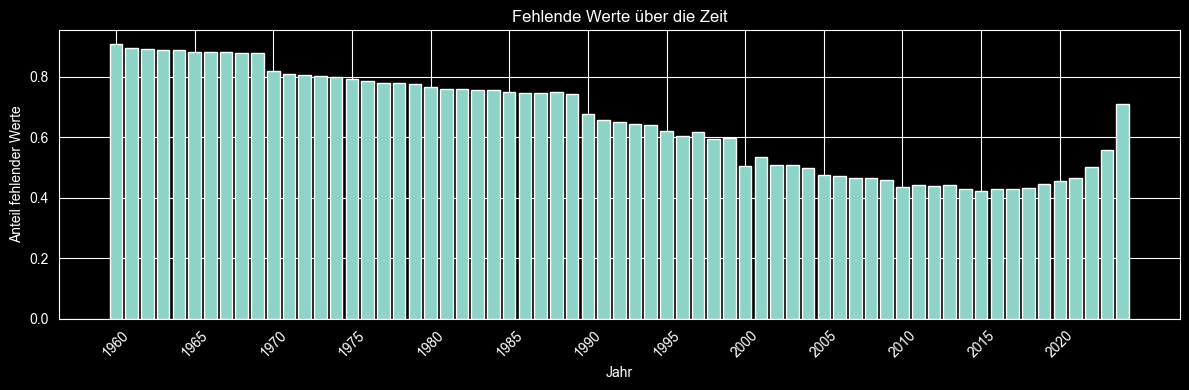

In [14]:
# Fehlende Werte pro Jahr
missing_per_year = df[year_cols].isna().mean()

plt.figure(figsize=(12, 4))
plt.bar(missing_per_year.index, missing_per_year.values)
plt.xlabel("Jahr")
plt.ylabel("Anteil fehlender Werte")
plt.title("Fehlende Werte über die Zeit")
plt.xticks(rotation=45)
# Nur jedes 5. Jahr als Label
plt.xticks(range(0, len(year_cols), 5), [year_cols[i] for i in range(0, len(year_cols), 5)])
plt.tight_layout()
plt.show()

## 8. Nächste Schritte

- Relevante Indikatoren für Hypothesen auswählen
- Daten ins Long-Format transformieren
- Länder vs. Aggregate (Regionen, Weltbank-Gruppen) trennen
- Zeitraum eingrenzen (Datenverfügbarkeit)